# Проверка гипотез по увеличению выручки в интернет-магазине и оценка результатов A/B теста

Используя данные интернет-магазина приоритезировать гипотезы, произвести оценку результатов A/B-тестирования различными методами

# Подготовительные действия

In [1]:
# подключаем необходимые модули
from IPython.display import display
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

# отключаем предупреждения фильтрации
import warnings
warnings.filterwarnings("ignore")

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Приоритизация-с-помощью-фреймворка-ICE" data-toc-modified-id="Приоритизация-с-помощью-фреймворка-ICE-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Приоритизация с помощью фреймворка <code>ICE</code></a></span></li><li><span><a href="#Приоритизация-с-помощью-фреймворка-RICE" data-toc-modified-id="Приоритизация-с-помощью-фреймворка-RICE-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Приоритизация с помощью фреймворка <code>RICE</code></a></span></li><li><span><a href="#Изменения-в-приоритизации-гипотез-при-применении-RICE-вместо-ICE" data-toc-modified-id="Изменения-в-приоритизации-гипотез-при-применении-RICE-вместо-ICE-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изменения в приоритизации гипотез при применении <code>RICE</code> вместо <code>ICE</code></a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Приведём-названия-столбцов-датасета-orders-к-нижнему-регистру" data-toc-modified-id="Приведём-названия-столбцов-датасета-orders-к-нижнему-регистру-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Приведём названия столбцов датасета <code>orders</code> к нижнему регистру</a></span></li><li><span><a href="#Проверим-датасеты-на-наличие-полных-дубликатов" data-toc-modified-id="Проверим-датасеты-на-наличие-полных-дубликатов-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Проверим датасеты на наличие полных дубликатов</a></span></li><li><span><a href="#Проверка-наличия-пользователей,-попавших-в-обе-группы" data-toc-modified-id="Проверка-наличия-пользователей,-попавших-в-обе-группы-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Проверка наличия пользователей, попавших в обе группы</a></span></li><li><span><a href="#Приведём-данные-к-нужным-типам" data-toc-modified-id="Приведём-данные-к-нужным-типам-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Приведём данные к нужным типам</a></span></li><li><span><a href="#Вывод-по-подготовке-данных" data-toc-modified-id="Вывод-по-подготовке-данных-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Вывод по подготовке данных</a></span></li></ul></li><li><span><a href="#Исследуем-изменение-кумулятивной-выручки" data-toc-modified-id="Исследуем-изменение-кумулятивной-выручки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследуем изменение кумулятивной выручки</a></span></li><li><span><a href="#Исследуем-изменение-кумулятивного-среднего-чека" data-toc-modified-id="Исследуем-изменение-кумулятивного-среднего-чека-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем изменение кумулятивного среднего чека</a></span></li><li><span><a href="#Исследуем-относительное-изменение-кумулятивного-среднего-чека-группы-B-к-группе-A" data-toc-modified-id="Исследуем-относительное-изменение-кумулятивного-среднего-чека-группы-B-к-группе-A-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Исследуем относительное изменение кумулятивного среднего чека группы B к группе A</a></span></li><li><span><a href="#Исследуем-изменение-кумулятивной-конверсии" data-toc-modified-id="Исследуем-изменение-кумулятивной-конверсии-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Исследуем изменение кумулятивной конверсии</a></span></li><li><span><a href="#Исследуем-относительное-изменение-кумулятивной-конверсии" data-toc-modified-id="Исследуем-относительное-изменение-кумулятивной-конверсии-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Исследуем относительное изменение кумулятивной конверсии</a></span></li><li><span><a href="#Построим-точечный-график-количества-заказов-на-одного-пользователя" data-toc-modified-id="Построим-точечный-график-количества-заказов-на-одного-пользователя-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Построим точечный график количества заказов на одного пользователя</a></span></li><li><span><a href="#Найдём-95-й-и-99-й-перцентили-количества-заказов-на-пользователя" data-toc-modified-id="Найдём-95-й-и-99-й-перцентили-количества-заказов-на-пользователя-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Найдём 95-й и 99-й перцентили количества заказов на пользователя</a></span></li><li><span><a href="#Построим-точечный-график-стоимостей-заказов" data-toc-modified-id="Построим-точечный-график-стоимостей-заказов-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Построим точечный график стоимостей заказов</a></span></li><li><span><a href="#Найдём-95-й-и-99-й-перцентили-стоимости-заказов" data-toc-modified-id="Найдём-95-й-и-99-й-перцентили-стоимости-заказов-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Найдём 95-й и 99-й перцентили стоимости заказов</a></span></li><li><span><a href="#Посчитаем-статистическую-значимость-различий-в-конверсии-между-группами-по-&quot;сырым&quot;-данным" data-toc-modified-id="Посчитаем-статистическую-значимость-различий-в-конверсии-между-группами-по-&quot;сырым&quot;-данным-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Посчитаем статистическую значимость различий в конверсии между группами по "сырым" данным</a></span></li><li><span><a href="#Посчитаем-статистическую-значимость-различий-в-среднем-чеке-между-группами-по-&quot;сырым&quot;-данным" data-toc-modified-id="Посчитаем-статистическую-значимость-различий-в-среднем-чеке-между-группами-по-&quot;сырым&quot;-данным-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Посчитаем статистическую значимость различий в среднем чеке между группами по "сырым" данным</a></span></li><li><span><a href="#Посчитаем-статистическую-значимость-различий-в-конверсии-между-группами-по-&quot;сырым&quot;-данным" data-toc-modified-id="Посчитаем-статистическую-значимость-различий-в-конверсии-между-группами-по-&quot;сырым&quot;-данным-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>Посчитаем статистическую значимость различий в конверсии между группами по "сырым" данным</a></span></li><li><span><a href="#Посчитаем-статистическую-значимость-различий-в-среднем-чеке-между-группами-по-&quot;очищенным&quot;-данным" data-toc-modified-id="Посчитаем-статистическую-значимость-различий-в-среднем-чеке-между-группами-по-&quot;очищенным&quot;-данным-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>Посчитаем статистическую значимость различий в среднем чеке между группами по "очищенным" данным</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-2.15"><span class="toc-item-num">2.15&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Приоритизация гипотез

In [2]:
# загружаем данные о гипотезах
data = pd.read_csv('datasets/hypothesis.csv')

# выведем на экран информацию о датасете
display(data.info())

#
pd.set_option('display.max_colwidth', 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Так как у нас всего 9 строк, можно посмотреть на таблицу целиком:

In [3]:
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Итак, мы увидели следующее:

- пропусков данных нет
- дубликатов нет
- данные имеют пусть и избыточные в контексте содержания, но верные типы
- названия столбцов имеют неудобные для работы названия - необходимо будет привести их к нижнему регистру

В целом, для дальнейших расчётов данные готовы.

In [4]:
# приведём названия столбцов к нижнему регистру для удобства работы
data.columns = map(str.lower, data.columns)

# проверим, что всё получилось
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

### Приоритизация с помощью фреймворка `ICE`

In [5]:
# рассчитаем значение показателя ICE
data['ICE'] = (
    data['impact'] * data['confidence'] / data['efforts']
)

# выведем данные, отсортированные по убыванию показателя ICE
display(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Приоритизация с помощью фреймворка `RICE`

In [6]:
# рассчитаем значение показателя RICE
data['RICE'] = (
    data['reach'] * data['ICE']
)

# выведем данные, отсортированные по убыванию показателя RICE
display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Изменения в приоритизации гипотез при применении `RICE` вместо `ICE`

In [7]:
#
display(data[['hypothesis', 'ICE', 'RICE', 'reach']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE,RICE,reach
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2,1
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0,10
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0,5
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0,3


Опишем обнаруженные изменения в приоритизации гипотез при смене фреймворка:

1. Гипотеза №8 с 1-го места переместилась на 5-е
2. Гипотеза №0 со 2-го переместилась на 3-е место
3. Гипотеза №7 с 3-го места переместилась на 1-е 
4. Гипотеза №6 осталась на своём 4-м месте
5. Гипотеза №2 с 5-го места переместилась на 2-е
6. Гипотеза №1 с 6-го места переместилась на 7-е
7. Гипотеза №5 с 7-го места переместилась на 8-е
8. Гипотеза №3 с 8-го места переместилась на 6-е
9. Гипотеза №4 осталась на последнем, 9-м месте 

Поясним произошедшие изменения. К имевшимся значениям добавился дополнительный сомножитель, распределение которого не зависит от всех предыдущих, который и изменил итоговые значения.

Гипотеза №8 имеет минимальное значение оценки охвата (1), и в итоге оценка данной гипотезы не изменилась при смене фреймворка. Гипотеза №0 не свои показатели благодаря высокому изначальному рейтингу и неплохому значению оценки охвата. из-за максимального охвата (10).  из-за большого охвата (8)  Изначально высокий рейтинг, помноженный на максимальное значение оценки охвата выводит эту гипотезу в лидеры. Если умножить единицу на тройку, лучше не станет 😊
 
Произошедшие изменения - чистая математика.  
Более того, существует некоторая ненулевая вероятность того, что если мы произведем приоритизацию по фреймворку ICE, а затем захотим перейти на фреймворе RICE, то оценки охвата будут иметь такое распределение, что будучи помноженными на изначальные рейтинги, уравняют значения итоговых показателей и сделают гипотезы равноприоритетными.

Это наводит нас на мысль о том, что перед приоритизацией гипотез необходимо заранее определиться с фреймворком и понять, какой из них больше подходит лично нам (нужна ли нам оценка охвата или нет).

Перейдём к исследованию результатов A/B-теста.

## Анализ A/B-теста

### Подготовка данных

In [8]:
# загрузим данные о результатах 
orders = pd.read_csv('datasets/orders.csv')
visits = pd.read_csv('datasets/visitors.csv')

# выведем на экран информацию о данных
display(orders.info(memory_usage='deep'))
display(visits.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 179.0 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 8.4 KB


None

- Пропусков данных нет
- Столбцы с датами имеют неверный тип данных
- Столбцы с числовыми данными имеют избыточные типы данных
- Названия столбцов в датасете `orders` записаны с использованием Camel case, что неудобно для дальнейшей работы

На основании обнаруженного, нам нужно будет подготовить даннные:

- Проверить данные на полные дубликаты
- Привести данные к нужным типам
- Привести названия столбцов к нижнему регистру

#### Приведём названия столбцов датасета `orders` к нижнему регистру

In [9]:
orders.columns = map(str.lower, orders.columns)

#### Проверим датасеты на наличие полных дубликатов

In [10]:
# проверим датасет orders
print('В датасете orders {} полных дубликатов'.format(orders.duplicated().sum()))

# проверим датасет visits
print('В датасете visits {} полных дубликатов'.format(visits.duplicated().sum()))

В датасете orders 0 полных дубликатов
В датасете visits 0 полных дубликатов


Полных дубликатов в обоих датасетах не найдено. Теперь нужно проверить, нет ли у нас дубликатов иного рода - пользователей, которые попали в обе группы.

#### Проверка наличия пользователей, попавших в обе группы

In [11]:
# сохраним все visitorid, которые делали заказы более чем в одной группе
visitorsAB = orders.groupby('visitorid').agg({'group':'nunique'}).sort_values(
    by='group',
    ascending=False
).reset_index().query('group > 1')['visitorid']

# выведем их количество на экран
print('В датасете orders {} посетителей входят как в группу A, так и в группу B'.format(len(visitorsAB)))

# посчитаем доли от общего числа пользователей в каждой группе, которые попали в обе группы
a_ratio = len(visitorsAB) / orders.query('group == "A"')['visitorid'].nunique()
b_ratio = len(visitorsAB) / orders.query('group == "B"')['visitorid'].nunique()

# выведем доли на экран
print('Это составляет {:.2%} от общего числа посетителей группы A и {:.2%} от общего числа посетителей группы B'.format(a_ratio, b_ratio))

# посчитаем и выведем на экран долю заказов, сделанных пользователями, вошедшими в обе группы
print('{:.2%} от общего числа заказов сделано пользователями, входящими как в группу A, так и в группу B'.format(len(orders[orders['visitorid'].isin(visitorsAB)]) / len(orders)))

В датасете orders 58 посетителей входят как в группу A, так и в группу B
Это составляет 11.53% от общего числа посетителей группы A и 9.90% от общего числа посетителей группы B
15.12% от общего числа заказов сделано пользователями, входящими как в группу A, так и в группу B


Мы обнаружили, что есть значительная часть данных, которая может исказить восприятие результатов теста - пользователи, которые попали в обе группы. Удалить эти данные мы не можем из-за их количества, поэтому будем оценивать результаты как есть. При этом обязательно нужно будет сообщить коллегам, чтобы впредь внимательнее проверяли данные.

#### Приведём данные к нужным типам

In [12]:
# приведём даты к правильным типам
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

In [13]:
# приведём числовые данные к необходимым и достаточным типам
for i in ['transactionid', 'visitorid', 'revenue']:
    orders[i] = pd.to_numeric(orders[i], downcast='unsigned')
    
visits['visitors'] = pd.to_numeric(visits['visitors'], downcast='unsigned')

In [14]:
# проверим как прошло приведение типов
display(orders.info(memory_usage='deep'))
display(visits.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null uint32
visitorid        1197 non-null uint32
date             1197 non-null datetime64[ns]
revenue          1197 non-null uint32
group            1197 non-null object
dtypes: datetime64[ns](1), object(1), uint32(3)
memory usage: 96.0 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null uint16
dtypes: datetime64[ns](1), object(1), uint16(1)
memory usage: 4.5 KB


None

#### Вывод по подготовке данных

- Названия столбцов в датасете `orders` приведены к нижнему регистру для удобства
- Полных дубликатов не обнаружено
- Обнаружено значительное количество записей, которые относятся к обеим группам. Принято решение оставить их как есть и уведомить коллег, готовивших данные
- После приведения типов потребление памяти сократилось:
 - Для датасета `orders` на 47.62% (со 174.3 Кб до 91.3 Кб)
 - Для датасете `visits` на 48.78% (с 8.2 Кб до 4.2 Кб)

Будем считать, что данные готовы и приступим к анализу.

### Исследуем изменение кумулятивной выручки

In [15]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_agg = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}),
    axis=1
).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_agg = dates_groups.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}),
    axis=1
).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumul_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cumul_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

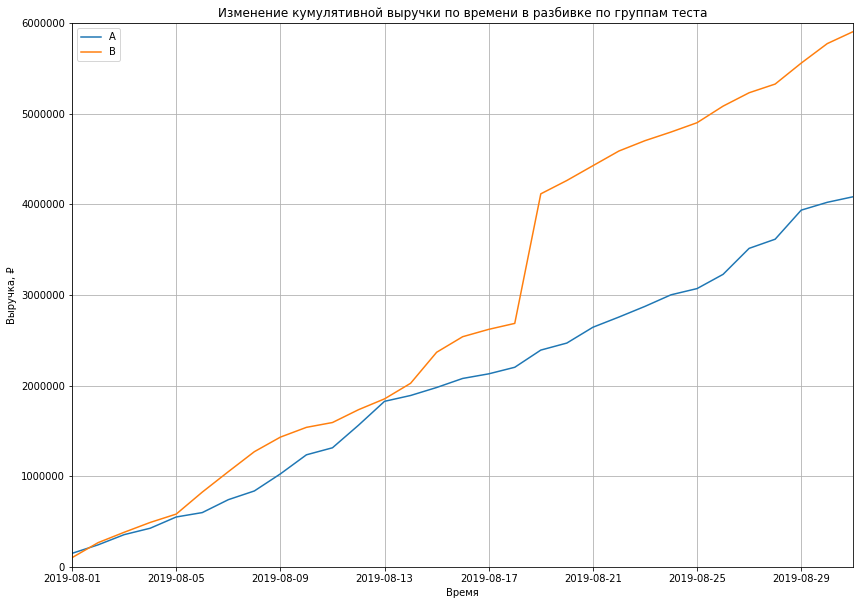

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumul_revenue_a = cumul_data[cumul_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumul_revenue_b = cumul_data[cumul_data['group']=='B'][['date','revenue', 'orders']]

# построим графики кумулятивной выручки
fig, plots = plt.subplots()

# задаём размер графика
fig.set_figwidth(14)
fig.set_figheight(10)

# подписываем оси и выводим заголовок
plots.set_title('Изменение кумулятивной выручки по времени в разбивке по группам теста')
plots.set_xlabel('Время')
plots.set_ylabel('Выручка, ₽')

# строим графики
plots.plot(cumul_revenue_a['date'], cumul_revenue_a['revenue'], label='A')
plots.plot(cumul_revenue_b['date'], cumul_revenue_b['revenue'], label='B')

# добавляем легенду, сетку и масштабируем оси
plots.legend()
plots.grid()
plots.axis([cumul_revenue_a['date'].min(), cumul_revenue_a['date'].max(), 0, 6000000])
plt.show()

Глядя на график мы видим, что кумулятивная выручка в обеих группах равномерно увеличивается в течение всего теста. Это очень хорошо.
На графике выручки группы B есть резкий скачок в районе 18-19 августа. Это может быть связано как со всплеском числа заказов в данной группе, так и с аномально крупными заказами. Это мы выясним чуть позже.

### Исследуем изменение кумулятивного среднего чека

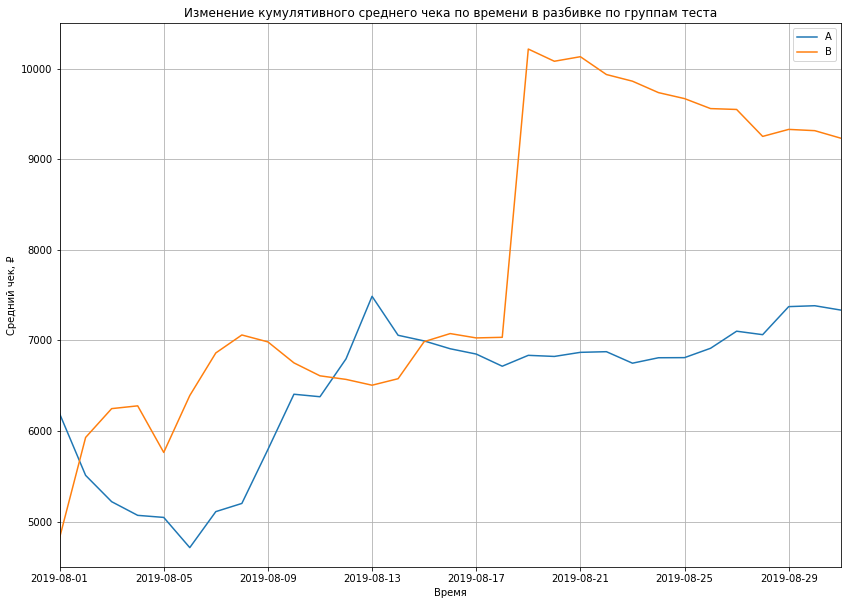

In [17]:
fig, plots = plt.subplots()

# задаём размер графика
fig.set_figwidth(14)
fig.set_figheight(10)

# подписываем оси и выводим заголовок
plots.set_title('Изменение кумулятивного среднего чека по времени в разбивке по группам теста')
plots.set_xlabel('Время')
plots.set_ylabel('Средний чек, ₽')

# строим графики
plots.plot(cumul_revenue_a['date'], cumul_revenue_a['revenue']/cumul_revenue_a['orders'], label='A')
plots.plot(cumul_revenue_b['date'], cumul_revenue_b['revenue']/cumul_revenue_b['orders'], label='B')

# добавляем легенду, сетку и масштабируем оси
plots.legend()
plots.grid()
plots.axis([cumul_revenue_a['date'].min(), cumul_revenue_a['date'].max(), 4500, 10500])
plt.show()

На графике среднего чека мы видим, что для группы A он стабилизировался 18 августа и после этого времени начинает понемногу возрастать. Для группы B же после резкого скачка в районе 18-19 августа он начинает равномерно убывать. С учётом того, что средний чек это выручка, делённая на число заказов, можно сделать вывод, что 18-19 августа всё же было не аномальное увеличение числа заказов, а заказы с аномальной сумммой.

### Исследуем относительное изменение кумулятивного среднего чека группы B к группе A

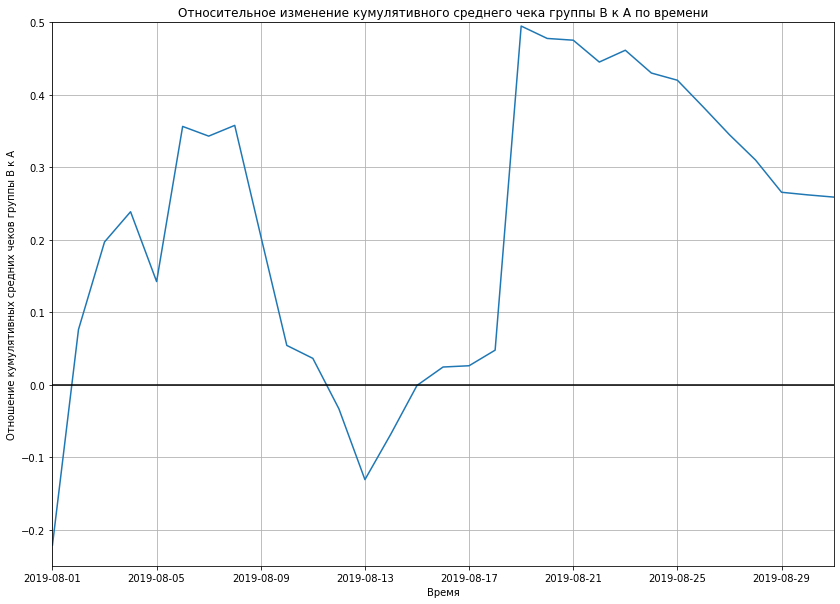

In [18]:
# собираем данные в одном датафрейме
merged_cumul_revenue = cumul_revenue_a.merge(cumul_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# поcтроим график отношения средних чеков
fig, plots = plt.subplots()

# задаём размер графика
fig.set_figwidth(14)
fig.set_figheight(10)

# подписываем оси и выводим заголовок
plots.set_title('Относительное изменение кумулятивного среднего чека группы B к A по времени')
plots.set_xlabel('Время')
plots.set_ylabel('Отношение кумулятивных средних чеков группы B к А')

# строим график
plots.plot(merged_cumul_revenue['date'], (merged_cumul_revenue['revenueB']/merged_cumul_revenue['ordersB'])/(merged_cumul_revenue['revenueA']/merged_cumul_revenue['ordersA'])-1)

# выделяем ось X
plots.axhline(y=0, color='black', linestyle='-')

# добавляем сетку и масштабируем оси
plots.grid()
plots.axis([cumul_revenue_a['date'].min(), cumul_revenue_a['date'].max(), -0.25, 0.5])
plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Затем был резкий провал, ещё более резкий взлёт, и отношение средних чеков ещё не установилось - оно продолжает снижаться. Провалы и взлёты на графике подтверждают, что где-то есть аномалии.

### Исследуем изменение кумулятивной конверсии

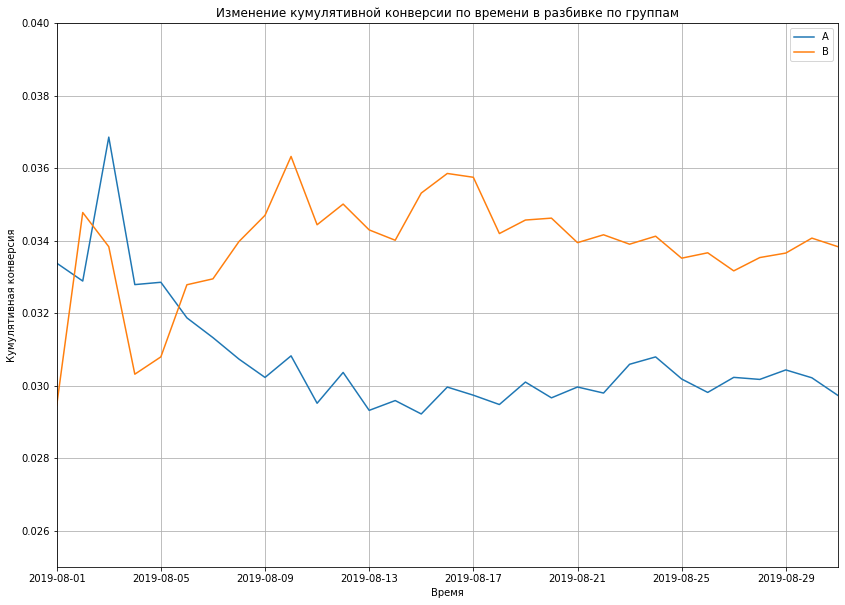

In [19]:
# считаем кумулятивную конверсию
cumul_data['conversion'] = cumul_data['orders']/cumul_data['visitors']

# отделяем данные по группе A
cumul_data_a = cumul_data[cumul_data['group']=='A']

# отделяем данные по группе B
cumul_data_b = cumul_data[cumul_data['group']=='B']

# построим графики
fig, plots = plt.subplots()

# задаём размер графика
fig.set_figwidth(14)
fig.set_figheight(10)

# подписываем оси и выводим заголовок
plots.set_title('Изменение кумулятивной конверсии по времени в разбивке по группам')
plots.set_xlabel('Время')
plots.set_ylabel('Кумулятивная конверсия')

# строим графики
plots.plot(cumul_data_a['date'], cumul_data_a['conversion'], label='A')
plots.plot(cumul_data_b['date'], cumul_data_b['conversion'], label='B')

# добавляем легенду, сетку и масштабируем оси
plots.legend()
plots.grid()
plots.axis([cumul_revenue_a['date'].min(), cumul_revenue_a['date'].max(), 0.025, 0.04])
plt.show()

До 6 августа конверсии хаотично колебались, после у группы B конверсия начала увеличиваться, а у группы A - падать. После 18 августа конверсии практически зафиксировались - 0.034 для группы B и 0.03 для группы A

### Исследуем относительное изменение кумулятивной конверсии

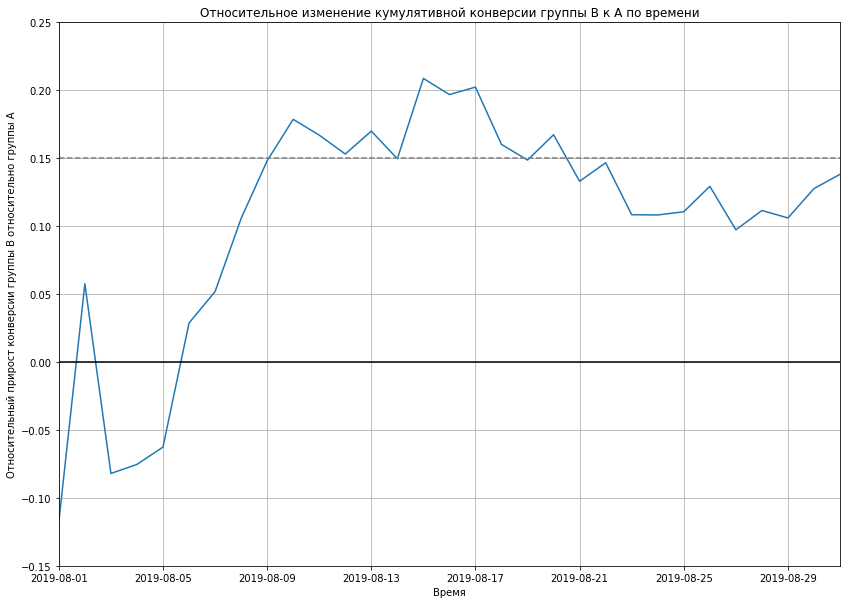

In [20]:
# собираем данные в одном датафрейме
merged_cumul_conv = cumul_data_a[['date','conversion']].merge(cumul_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# поcтроим график отношения кумулятивных конверсий
fig, plots = plt.subplots()

# задаём размер графика
fig.set_figwidth(14)
fig.set_figheight(10)

# подписываем оси и выводим заголовок
plots.set_title('Относительное изменение кумулятивной конверсии группы B к A по времени')
plots.set_xlabel('Время')
plots.set_ylabel('Относительный прирост конверсии группы B относительно группы A')

# cтроим график
plots.plot(merged_cumul_conv['date'], merged_cumul_conv['conversionB']/merged_cumul_conv['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

# выделяем ось X и горизонталь Y=0.15
plots.axhline(y=0, color='black', linestyle='-')
plots.axhline(y=0.15, color='grey', linestyle='--')

# добавляем сетку и масштабируем оси
plots.grid()
plots.axis([cumul_revenue_a['date'].min(), cumul_revenue_a['date'].max(), -0.15, 0.25])
plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт. После 10 августа отношение конверсий колеблется около значения 0.15

### Построим точечный график количества заказов на одного пользователя

In [21]:
# формируем датафрейм
orders_by_users = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

orders_by_users.columns = ['visitorid', 'orders']

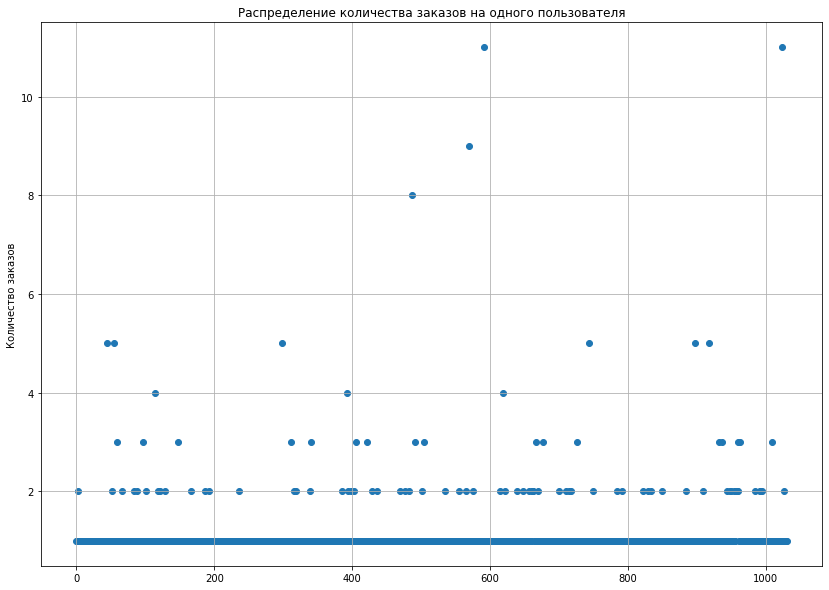

In [22]:
# создаём массив значений по оси X
x_values = pd.Series(range(0,len(orders_by_users)))

# построим точечный график количества заказов
fig, plots = plt.subplots()

# задаём размер графика
fig.set_figwidth(14)
fig.set_figheight(10)

# подписываем оси и выводим заголовок
plots.set_title('Распределение количества заказов на одного пользователя')
plots.set_xlabel('')
plots.set_ylabel('Количество заказов')

# cтроим график
plots.scatter(x_values, orders_by_users['orders'])

# добавляем сетку
plots.grid()
plt.show()

График показывает, что основная часть пользователей сделала по 1 заказу. Есть большая группа пользователей с 2-мя заказами, небольшая группа с 3-мя заказами и далее разрозненные аномальные пользователи с 4-мя и более заказами.

### Найдём 95-й и 99-й перцентили количества заказов на пользователя

In [23]:
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[2. 4.]


Итак, не более 5% пользователей оформляли более 2 заказов, и не более 1% оформляли более 4-х.

При проверке гипотезы о равенстве долей по "очищенным" данным будем считать всех пользователей, сделавших более 2-х заказов аномалиями.

### Построим точечный график стоимостей заказов

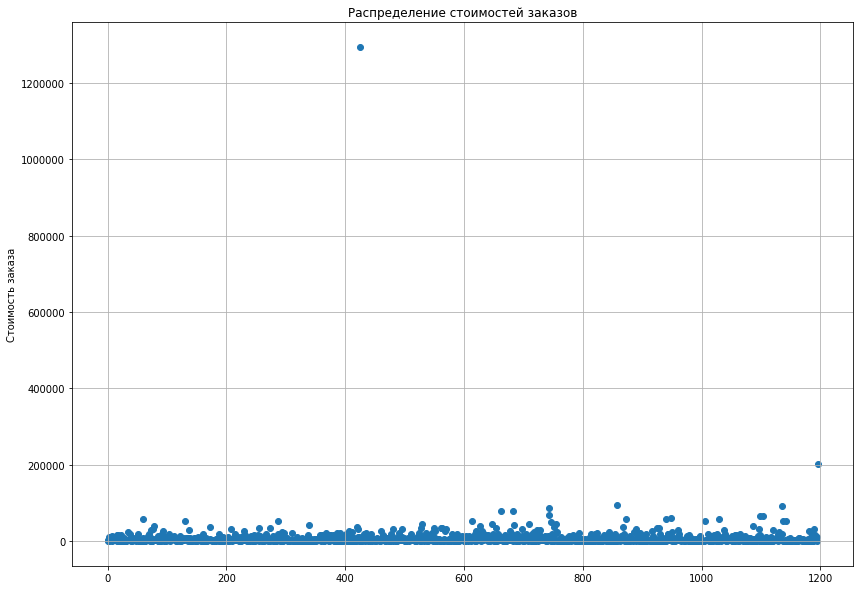

In [24]:
# создаём массив значений по оси X
x_values = pd.Series(range(0,len(orders['revenue'])))

# построим точечный график стоимостей заказов
fig, plots = plt.subplots()

# задаём размер графика
fig.set_figwidth(14)
fig.set_figheight(10)

# подписываем оси и выводим заголовок
plots.set_title('Распределение стоимостей заказов')
plots.set_xlabel('')
plots.set_ylabel('Стоимость заказа')

# cтроим график
plots.scatter(x_values, orders['revenue'])

# добавляем сетку
plots.grid()
plt.show()

На графике присутствуют две ярких аномалии - заказ стоимостью более 1,2 млн. ₽ и заказ стоимостью около 200000₽.
Основная часть заказов имеет стоимость ориентировочно не более 30000₽. Это мы уточним чуть позже

### Найдём 95-й и 99-й перцентили стоимости заказов

In [25]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Итак, наши ориентировочные выводы из графика подтвердились. Большинство пользователей (95%) сделали заказы на сумму не более 28000₽. И лишь 1% пользователей делали заказы стоимостью выше 58233,2₽. Т.е. обе наши аномалии входят в этот 1%.

При проверке гипотезы о равенстве долей по "очищенным" данным будем считать все заказы стоимостью более 28000 аномалиями.

### Посчитаем статистическую значимость различий в конверсии между группами по "сырым" данным

In [26]:
## подготовим данные для дальнейшей работы
# количество пользователей в день для группы A
visitors_a_daily = visits[visits['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# количество пользователей до выбранной даты в группе A
visitors_a_cumm = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cumm.columns = ['date', 'visitors_cumm_a']

# количество пользователей в день для группы B
visitors_b_daily = visits[visits['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# количество пользователей до выбранной даты в группе B
visitors_b_cumm = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cumm.columns = ['date', 'visitors_cumm_b']

# количество заказов в день для группы A
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# количество заказов и кумулятивная выручка до выбранной даты в группе A
orders_a_cumm = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cumm.columns = [
    'date',
    'orders_cumm_a',
    'revenue_cumm_a',
]

# количество заказов в день для группы B
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# количество заказов и кумулятивная выручка до выбранной даты в группе B
orders_b_cumm = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cumm.columns = [
    'date',
    'orders_cumm_b',
    'revenue_cumm_b',
]

# объединяем данные в один датафрейм
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cumm, left_on='date', right_on='date', how='left')
    .merge(orders_b_cumm, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cumm, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cumm, left_on='date', right_on='date', how='left')
)

In [27]:
## для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
# для группы A
ord_by_user_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ord_by_user_a.columns = ['visitorid', 'orders']

# для группы B
ord_by_user_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ord_by_user_b.columns = ['visitorid', 'orders']

In [28]:
## подготовим выборки для проверки критерием Манна-Уитни
## к полученным выше данным присоединим нули для всех тех пользователей, которые ничего не заказали
# для группы A
sample_a = pd.concat(
    [
        ord_by_user_a['orders'],
        pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(ord_by_user_a['orders'])), name='orders')
    ],
    axis=0
)

# для группы B
sample_b = pd.concat(
    [
        ord_by_user_b['orders'],
        pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(ord_by_user_b['orders'])), name='orders')
    ],
    axis=0
)

Нулевая и альтернативная гипотеза в нашем случае будут звучать следующим образом:

H<sub>0</sub>: статистически значимых различий между конверсиями групп A и B нет<br>
H<sub>1</sub>: статистически значимые различия между конверсиями групп A и B присутствуют

Критерий статистической значимости α примем равным 0,05

In [29]:
print('P-value проверки критерием Манна-Уитни составил {0:.3f}'.format(st.mannwhitneyu(sample_a, sample_b)[1]))

P-value проверки критерием Манна-Уитни составил 0.008


Полученный p-value значительно меньше выбранного α, поэтому нулевую гипотезу отвергаем и делаем вывод, что статистически значимые различия между конверсиями групп присутствуют. Посчитаем относительный прирост конверсии группы B к группе A

In [30]:
print('{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

0.138


Относительный выигрыш группы B составил 13,8%

### Посчитаем статистическую значимость различий в среднем чеке между группами по "сырым" данным

Сформируем нулевую и альтернативную гипотезы:

H<sub>0</sub>: статистически значимых различий между средними чеками групп A и B нет<br>
H<sub>1</sub>: статистически значимые различия между средними чеками групп A и B присутствуют

Критерий статистической значимости α примем равным 0,05

In [31]:
print('P-value проверки критерием Манна-Уитни составил {0:.3f}'.format(
    st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
     )

P-value проверки критерием Манна-Уитни составил 0.365


Полученный p-value больше выбранного α, поэтому мы не можем отвергнуть нулевую гипотезу и делаем вывод, что статистически значимые различия между средними чеками групп отсутствуют. Посчитаем относительный прирост среднего чека группы B к группе A

In [32]:
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.259


При этом средний чек группы B на 25,9% выше, чем у группы A 

### Посчитаем статистическую значимость различий в конверсии между группами по "сырым" данным

In [33]:
## подготовим данные
# список всех пользователей с аномальным числом заказов (больше 2)
users_with_many_orders = pd.concat(
    [
        ord_by_user_a[ord_by_user_a['orders'] > 2]['visitorid'],
        ord_by_user_b[ord_by_user_b['orders'] > 2]['visitorid'],
    ],
    axis=0,
)

# список всех пользователей с аномально дорогими заказами (больше 28000₽)
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitorid']

# общий список аномальных пользователей
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# выведем на экран количество
print('Всего в группах содержится {} аномальных пользователей'.format(abnormal_users.shape[0]))

Всего в группах содержится 74 аномальных пользователей


In [34]:
## подготовим выборки для проверки критерием Манна-Уитни
## к отфильтрованным данным присоединим нули для всех тех пользователей, которые ничего не заказали
# для группы A
sample_a_filt = pd.concat(
    [
        ord_by_user_a[
            np.logical_not(ord_by_user_a['visitorid'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(ord_by_user_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# для группы B
sample_b_filt = pd.concat(
    [
        ord_by_user_b[
            np.logical_not(ord_by_user_b['visitorid'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(ord_by_user_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Нулевая и альтернативная гипотеза в нашем случае будут звучать следующим образом:

H<sub>0</sub>: статистически значимых различий между конверсиями групп A и B нет<br>
H<sub>1</sub>: статистически значимые различия между конверсиями групп A и B присутствуют

Критерий статистической значимости α примем равным 0,05

In [35]:
print('P-value проверки критерием Манна-Уитни составил {0:.3f}'.format(st.mannwhitneyu(sample_a_filt, sample_b_filt)[1]))

P-value проверки критерием Манна-Уитни составил 0.007


Полученный p-value значительно меньше выбранного α, поэтому нулевую гипотезу отвергаем и делаем вывод, что статистически значимые различия между конверсиями групп присутствуют. Посчитаем относительный прирост конверсии группы B к группе A

In [36]:
print('{0:.3f}'.format(sample_b_filt.mean()/sample_a_filt.mean()-1))

0.173


Относительный выигрыш группы B составил 17,3%, что на 3,6% выше, чем по "сырым" данным

### Посчитаем статистическую значимость различий в среднем чеке между группами по "очищенным" данным

Сформируем нулевую и альтернативную гипотезы:

H<sub>0</sub>: статистически значимых различий между средними чеками групп A и B нет<br>
H<sub>1</sub>: статистически значимые различия между средними чеками групп A и B присутствуют

Критерий статистической значимости α примем равным 0,05

In [37]:
print(
    'P-value проверки критерием Манна-Уитни составил {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

P-value проверки критерием Манна-Уитни составил 0.369


Полученный p-value больше выбранного α, поэтому мы не можем отвергнуть нулевую гипотезу и делаем вывод, что статистически значимые различия между средними чеками групп отсутствуют. Посчитаем относительный прирост среднего чека группы B к группе A

In [38]:
print(
    '{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

-0.020


При этом средний чек группы B на 2% меньше, чем у группы A. Это существенно отличается от результатов по "сырым" данным (25,9% выигрыш группы B) и более соответствует выводу об отсутствии различий в средних чеках групп.  

### Вывод по разделу

По результатам анализа A/B теста можно сказать следующее:

1. Данные для теста были подготовлены неудовлетворительно. В данных присутствует 58 посетителей, которые входят как в группу A, так и в группу B (11,53% от общего числа посетителей группы A и 9,90% от общего числа посетителей группы B). 15,12% от общего числа заказов сделано пользователями, входящими как в группу A, так и в группу B.
2. Кумулятивная выручка по обеим группам равномерно увеличивалась в течение теста. В группе B имеется аномальный скачок графика в районе 18-19 августа.
3. Изменение среднего чека стабилизировалось около 18 августа, после чего для группы B он начал равномерно убывать, а для группы A - возврастать.
4. Относительное изменение кумулятивного среднего чека показывает, что практически на всём протяжении теста средний чек группы B превосходил средний чек группы A. С 18 августа отношение начинает равномерно снижаться.
5. До 6 августа конверсии хаотично колебались, после у группы B конверсия начала увеличиваться, а у группы A - падать. После 18 августа конверсии практически зафиксировались - 0.034 для группы B и 0.03 для группы A.
6. В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт. После 10 августа отношение конверсий колеблется около значения 0.15, но ещё не установилось.
7. 95% пользователей сделали не более 2 заказов, 99% - не более 4. Имеется небольшая группа пользователей с аномальным количеством заказов.
8. 95% пользователей делали заказы стоимостью не превышающие 28000₽, 99% - не более 58233,2₽. Имеются незначительное количество аномалий по стоимости заказа, но эти аномалии оказывают значительное влияние на результат.
9. Статистическая значимость различий между конверсиями групп по "сырым" данным подтверждена.
10. Статистическая значимость различий между средними чеками групп по "сырым" данным отсутствует.
11. Статистическая значимость различий между конверсиями групп по "очищенным" данным подтверждена.
12. Статистическая значимость различий между средними чеками групп по "очищенным" данным отсутствует.

## Общий вывод

1. В результате приоритизации гипотез по различным фреймворкам мы получили следующие топ-3:
 - Для фреймворка `ICE`: гипотезы №№ 8, 0, 7 соответственно
 - Для фреймворка `RICE`: гипотезы №№ 7, 2, 0 соответсвенно

На будущее нам нужно заранее определяться с необходимым фреймворком и чётко понимать, важен ли для нас параметр охвата или нет, т.к. его введение кардинально меняет ранжирование гипотез
2. По результатам A/B теста мы принимаем решение **остановить тест и зафиксировать победу группы B**. Это решение основывается на следующих фактах:
 - Конверсии групп в целом устоялись и колеблятся возле определённых значений
 - Статистическими тестами подтверждено наличие статистически значимых различий в конверсиях между группами. При этом, по "очищенным" данным относительный выигрыш группы B даже выше
 - Статистическими тестами подтверждено отсутствие статистически значимых различий в средних чеках между группами. Графики суммарной выручки в целом также шли практически вровень до скачка группы B. Т.е. покупательское поведение в группах у нас одинаковое, но привлечение пользователей в группе B идёт лучше. Средний прирост конверсии в 17,3% это очень хороший показатель